In [5]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

import utils
import models

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

# 1. Linear Data with Linear Features [hyperparameters will be recorded]
In this block, you'll have to implement the complete Linear Regression learning_model. 
* This includes the `forward()` function which predicts the output for given features, the `backward()` function which trains the weight matrix, and the `loss()` function which calculates the Euclidean Loss.
* You'll also have to implement one part of the `calc_features()` function which combines the input data into a single chunk, to be then passed into the `forward()` and `backward()` function.

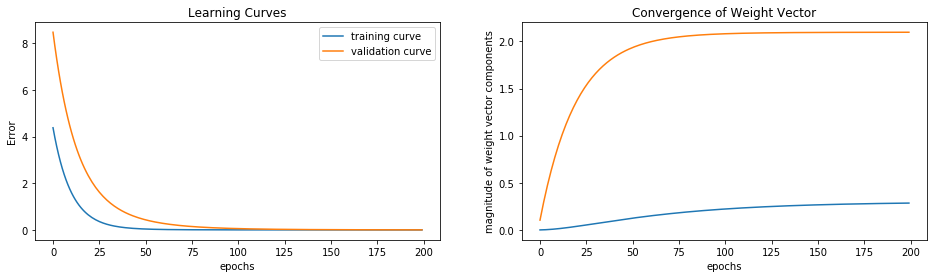

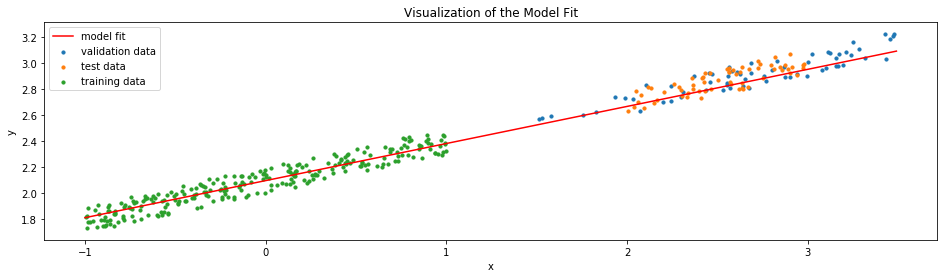

Final Validation Loss: 0.0054803124161853945


In [3]:
# generate artificial data
(x_train, y_train, x_val, y_val, x_test, y_test, left_limit, right_limit) = utils.data_generator(utils.linear)

# convert all the splits into numpy arrays
x_train, y_train = np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1)
x_val, y_val = np.array(x_val).reshape(-1,1), np.array(y_val).reshape(-1,1)
x_test, y_test = np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1)

TRAIN_LOSS = []
VAL_LOSS = []
no_epochs = 200

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# parameters you can adjust to reduce the validation loss (printed at the end)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
feat_type = 'linear'
param = 5 # ignore for linear case
lr = 0.050
weight_init = 'zeros'

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 1. Now you need to implement the 'linear' part of the calc_features() function in the models.py file.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
W_size = models.calc_features(np.array([[0]]), choice=feat_type, param=param).shape[1]

# create a model object from the linear_model class

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 2. Now you need to implement the forward(), backward() and loss() functions in the models.py file.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
learning_model = models.linear_model(W_size=W_size, lr=lr, init=weight_init) 

# train the model
for epoch in range(no_epochs):
    feat_train = models.calc_features(x_train, choice=feat_type, param=param)
    
    # forward pass: calculate the model's prediction on training data
    y_pred_train = learning_model.forward(feat_train)
    
    # compute the loss on training data
    loss_train = learning_model.loss(y_train, y_pred_train)
    TRAIN_LOSS.append(loss_train)
    
    # compute loss on validation data
    feat_val = models.calc_features(x_val, choice=feat_type, param=param)
    y_pred_val = learning_model.forward(feat_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    VAL_LOSS.append(loss_val)
    
    # backward pass: train the linear regression model, using gradient descent
    learning_model.backward(y_train, y_pred_train, feat_train)

# plot the training curves, convergence of weight vector, data fit
x_pred = np.arange(left_limit, right_limit, 0.01).reshape(-1,1)
feat = models.calc_features(x_pred, choice=feat_type, param=param)
y_pred = learning_model.forward(feat)

utils.plot(TRAIN_LOSS, VAL_LOSS, learning_model.LIST_W.T, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print('Final Validation Loss: {}'.format(loss_val))

# save your tuned hyper-parameters
utils.save_hyper('linear', feat_type, param, lr, weight_init)

#### 1.(b) Tuning the hyper-parameters for 'Linear Data with Linear Features' [hyperparameters will be recorded]
Now that your basic linear regression works (i.e. produces the three above graphs: `Learning Curves`, `Convergence of Weight Vector` and `Visualization of the Model Fit`), you should try changing the parameters mentioned above and try to reduce the `Final Validation Loss`. 

##### Learning Rate
* If the weight values shoot up, you are probably using too large a learning rate.
* If the weight values change very slowly, the learning rate is too small.

##### Weight Initialization
* Specifies how the weights are initialized, either randomly or by zeros.

##### Param
* used to specify parameter values in 'poly' and 'fourier' features. [To be encounterd below]

##### Feature Type
* which feature type to use.

# 2. Polynomial Data with Linear Features 
* You just need to experiment with tuning the hyper-parameters in order to minimize the validation loss.

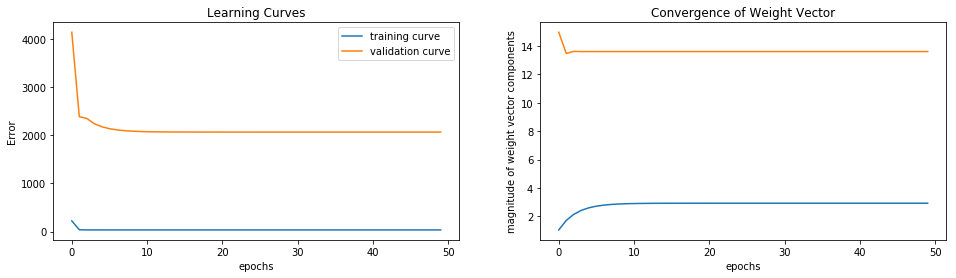

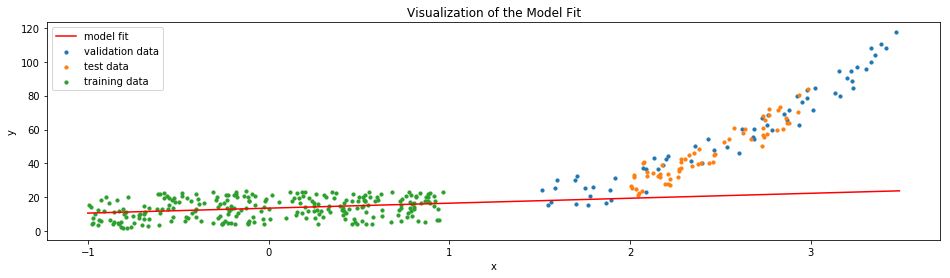

Final Validation Loss: 2069.318426066644


In [23]:
# generate artificial data
(x_train, y_train, x_val, y_val, x_test, y_test, left_limit, right_limit) = utils.data_generator(utils.poly)

# convert all the splits into numpy arrays
x_train, y_train = np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1)
x_val, y_val = np.array(x_val).reshape(-1,1), np.array(y_val).reshape(-1,1)
x_test, y_test = np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1)

TRAIN_LOSS = []
VAL_LOSS = []
no_epochs = 50

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 1. Hyper-parameters that you have to adjust in order to minimize the validation loss.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
feat_type = 'linear'
param = 6 # ignore for linear case
lr = 1.1

weight_init = 'zeros'

# create a model object from the linear_model class
W_size = models.calc_features(np.array([[0]]), choice=feat_type, param=param).shape[1]
learning_model = models.linear_model(W_size=W_size, lr=lr, init=weight_init) 

for epoch in range(no_epochs):
    feat_train = models.calc_features(x_train, choice=feat_type, param=param)
    
    # forward pass: calculate the model's prediction on training data
    y_pred_train = learning_model.forward(feat_train)
    
    # compute the loss on training data
    loss_train = learning_model.loss(y_train, y_pred_train)
    TRAIN_LOSS.append(loss_train)
    
    # compute loss on validation data
    feat_val = models.calc_features(x_val, choice=feat_type, param=param)
    y_pred_val = learning_model.forward(feat_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    VAL_LOSS.append(loss_val)
    
    # backward pass: train the linear regression model, using gradient descent
    learning_model.backward(y_train, y_pred_train, feat_train)
        
# plot the training curves, convergence of weight vector, data fit
x_pred = np.arange(left_limit, right_limit, 0.01).reshape(-1,1)
feat = models.calc_features(x_pred, choice=feat_type, param=param)
y_pred = learning_model.forward(feat)

utils.plot(TRAIN_LOSS, VAL_LOSS, learning_model.LIST_W.T, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print('Final Validation Loss: {}'.format(loss_val))

#### 2.(b) Reading the learning curves 
* If Training and Validation curves both decrease similarly, then the model is trained perfectly.
* If the Training curve reduces, while the Validation curve increases, the model is overfitted. Best way to tackle this problem is to increase the data size.
* In this problem, the model is trained nicely. However, it (the linear model) doesn't have enough representational power to fit this kind of non-linear data.

# 3. Polynomial Data with Polynomial Features [hyperparameters will be recorded]
* In this block, you'll have to implement the `'poly'` part of the `calc_features()` function.
* Also tune the hyper-parameters as before. 

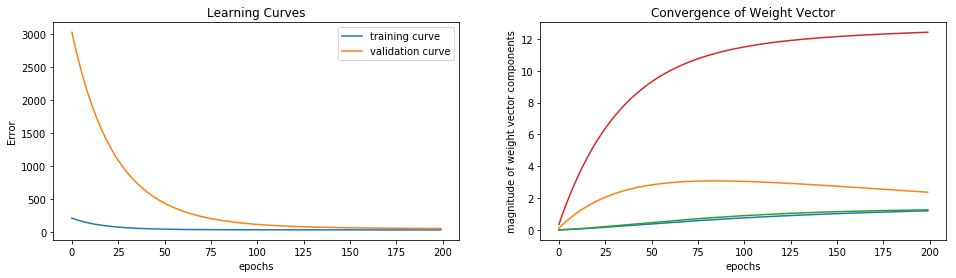

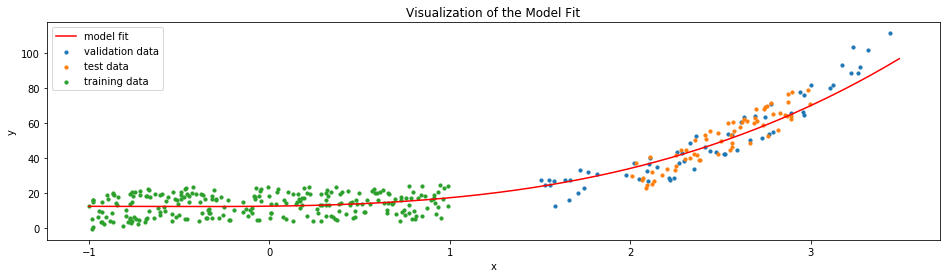

Final Validation Loss: 58.648934065050355


In [13]:
# generate artificial data
(x_train, y_train, x_val, y_val, x_test, y_test, left_limit, right_limit) = utils.data_generator(utils.poly)

# convert all the splits into numpy arrays
x_train, y_train = np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1)
x_val, y_val = np.array(x_val).reshape(-1,1), np.array(y_val).reshape(-1,1)
x_test, y_test = np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1)

TRAIN_LOSS = []
VAL_LOSS = []
no_epochs = 200

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 1. Hyper-parameters that you have to adjust in order to minimize the validation loss.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 2. Now you need to implement the 'poly' part of the calc_features() function in the models.py file.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
feat_type = 'poly'
param = 4 # specifies the degree of the fitting polynomial
lr = 0.0259
weight_init = 'zeros'

# create a model object from the linear_model class
W_size = models.calc_features(np.array([[0]]), choice=feat_type, param=param).shape[1]
learning_model = models.linear_model(W_size=W_size, lr=lr, init=weight_init) 

for epoch in range(no_epochs):
    feat_train = models.calc_features(x_train, choice=feat_type, param=param)
    
    # forward pass: calculate the model's prediction on training data
    y_pred_train = learning_model.forward(feat_train)
    
    # compute the loss on training data
    loss_train = learning_model.loss(y_train, y_pred_train)
    TRAIN_LOSS.append(loss_train)
    
    # compute loss on validation data
    feat_val = models.calc_features(x_val, choice=feat_type, param=param)
    y_pred_val = learning_model.forward(feat_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    VAL_LOSS.append(loss_val)
    
    # backward pass: train the linear regression model, using gradient descent
    learning_model.backward(y_train, y_pred_train, feat_train)
        
# plot the training curves, convergence of weight vector, data fit
x_pred = np.arange(left_limit, right_limit, 0.01).reshape(-1,1)
feat = models.calc_features(x_pred, choice=feat_type, param=param)
y_pred = learning_model.forward(feat)

utils.plot(TRAIN_LOSS, VAL_LOSS, learning_model.LIST_W.T, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print('Final Validation Loss: {}'.format(loss_val))

# save your tuned hyper-parameters
utils.save_hyper('poly', feat_type, param, lr, weight_init)

# 4. Periodic Data with Linear Features
* You just need to experiment with tuning the hyper-parameters in order to minimize the validation loss.

In [3]:
# generate artificial data
(x_train, y_train, x_val, y_val, x_test, y_test, left_limit, right_limit) = utils.data_generator(
    utils.sawtooth, 
    train_left=-10, train_right=10, train_size=256,
    val_left=11, val_right=15, val_size=64,
    test_left=12, test_right=14, test_size=64)

# convert all the splits into numpy arrays
x_train, y_train = np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1)
x_val, y_val = np.array(x_val).reshape(-1,1), np.array(y_val).reshape(-1,1)
x_test, y_test = np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1)

TRAIN_LOSS = []
VAL_LOSS = []
no_epochs = 200

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 1. Hyper-parameters that you have to adjust in order to minimize the validation loss.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
feat_type = 'linear'
param = 4 # ignore for linear case
lr = 1
weight_init = 'zeros'

# create a model object from the linear_model class
W_size = models.calc_features(np.array([[0]]), choice=feat_type, param=param).shape[1]
learning_model = models.linear_model(W_size=W_size, lr=lr, init=weight_init) 

for epoch in range(no_epochs):
    feat_train = models.calc_features(x_train, choice=feat_type, param=param)
    
    # forward pass: calculate the model's prediction on training data
    y_pred_train = learning_model.forward(feat_train)
    
    # compute the loss on training data
    loss_train = learning_model.loss(y_train, y_pred_train)
    TRAIN_LOSS.append(loss_train)
    
    # compute loss on validation data
    feat_val = models.calc_features(x_val, choice=feat_type, param=param)
    y_pred_val = learning_model.forward(feat_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    VAL_LOSS.append(loss_val)
    
    # backward pass: train the linear regression model, using gradient descent
    learning_model.backward(y_train, y_pred_train, feat_train)
        
# plot the training curves, convergence of weight vector, data fit
x_pred = np.arange(left_limit, right_limit, 0.01).reshape(-1,1)
feat = models.calc_features(x_pred, choice=feat_type, param=param)
y_pred = learning_model.forward(feat)

utils.plot(TRAIN_LOSS, VAL_LOSS, learning_model.LIST_W.T, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print('Final Validation Loss: {}'.format(loss_val))

NameError: name 'utils' is not defined

# 6. Periodic Data with Polynomial Features
* You just need to experiment with tuning the hyper-parameters in order to minimize the validation loss.

/home/yogesh/Downloads/Assignment_2__Linear_Regression_2D_data/models.py:127: RuntimeWarning: overflow encountered in square
  p=(y_pred - y_actl)**2
/home/yogesh/Downloads/Assignment_2__Linear_Regression_2D_data/models.py:102: RuntimeWarning: invalid value encountered in subtract
  self.W = self.W - (self.lr/len(y_actl))*np.dot(np.transpose(feat), (y_pred - y_actl))


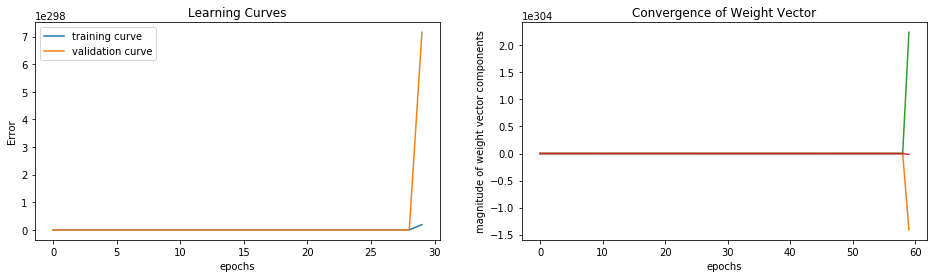

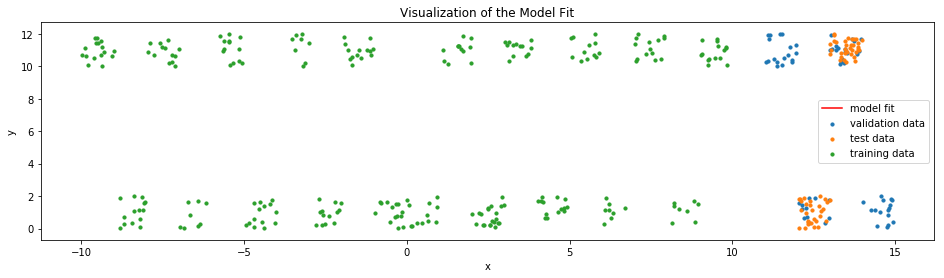

Final Validation Loss: nan


In [7]:
# generate artificial data
(x_train, y_train, x_val, y_val, x_test, y_test, left_limit, right_limit) = utils.data_generator(
    utils.sawtooth, 
    train_left=-10, train_right=10, train_size=256,
    val_left=11, val_right=15, val_size=64,
    test_left=12, test_right=14, test_size=64)

# convert all the splits into numpy arrays
x_train, y_train = np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1)
x_val, y_val = np.array(x_val).reshape(-1,1), np.array(y_val).reshape(-1,1)
x_test, y_test = np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1)

TRAIN_LOSS = []
VAL_LOSS = []
no_epochs = 200

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 1. Hyper-parameters that you have to adjust in order to minimize the validation loss.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
feat_type = 'poly'
param = 4 # specifies the degree of the fitting polynomial
lr = 1
weight_init = 'zeros'

# create a model object from the linear_model class
W_size = models.calc_features(np.array([[0]]), choice=feat_type, param=param).shape[1]
learning_model = models.linear_model(W_size=W_size, lr=lr, init=weight_init) 

for epoch in range(no_epochs):
    feat_train = models.calc_features(x_train, choice=feat_type, param=param)
    
    # forward pass: calculate the model's prediction on training data
    y_pred_train = learning_model.forward(feat_train)
    
    # compute the loss on training data
    loss_train = learning_model.loss(y_train, y_pred_train)
    TRAIN_LOSS.append(loss_train)
    
    # compute loss on validation data
    feat_val = models.calc_features(x_val, choice=feat_type, param=param)
    y_pred_val = learning_model.forward(feat_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    VAL_LOSS.append(loss_val)
    
    # backward pass: train the linear regression model, using gradient descent
    learning_model.backward(y_train, y_pred_train, feat_train)
        
# plot the training curves, convergence of weight vector, data fit
x_pred = np.arange(left_limit, right_limit, 0.01).reshape(-1,1)
feat = models.calc_features(x_pred, choice=feat_type, param=param)
y_pred = learning_model.forward(feat)

utils.plot(TRAIN_LOSS, VAL_LOSS, learning_model.LIST_W.T, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print('Final Validation Loss: {}'.format(loss_val))

# 7. Periodic Data with Fourier Features [hyperparameters will be recorded]
* In this block, you'll have to implement the `'fourier'` part of the `calc_features()` function.
* Also tune the hyper-parameters as before. 

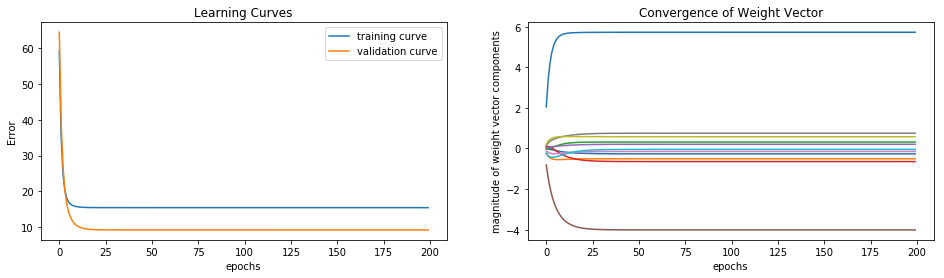

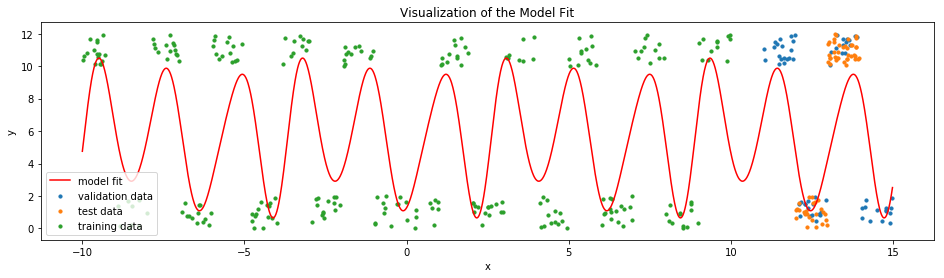

Final Validation Loss: 9.250586885525768


In [19]:
# generate artificial data
(x_train, y_train, x_val, y_val, x_test, y_test, left_limit, right_limit) = utils.data_generator(
    utils.sawtooth, 
    train_left=-10, train_right=10, train_size=256,
    val_left=11, val_right=15, val_size=64,
    test_left=12, test_right=14, test_size=64)

# convert all the splits into numpy arrays
x_train, y_train = np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1)
x_val, y_val = np.array(x_val).reshape(-1,1), np.array(y_val).reshape(-1,1)
x_test, y_test = np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1)

TRAIN_LOSS = []
VAL_LOSS = []
no_epochs = 200

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 1. Hyper-parameters that you have to adjust in order to minimize the validation loss.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 2. Now you need to implement the 'fourier' part of the calc_features() function in the models.py file.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
feat_type = 'fourier'
param = 4 # specifies the number of basic sine and cosine component waves to be used
lr = .35
weight_init = 'zeros'

# create a model object from the linear_model class
W_size = models.calc_features(np.array([[0]]), choice=feat_type, param=param).shape[1]
learning_model = models.linear_model(W_size=W_size, lr=lr, init=weight_init) 

for epoch in range(no_epochs):
    feat_train = models.calc_features(x_train, choice=feat_type, param=param)
    
    # forward pass: calculate the model's prediction on training data
    y_pred_train = learning_model.forward(feat_train)
    
    # compute the loss on training data
    loss_train = learning_model.loss(y_train, y_pred_train)
    TRAIN_LOSS.append(loss_train)
    
    # compute loss on validation data
    feat_val = models.calc_features(x_val, choice=feat_type, param=param)
    y_pred_val = learning_model.forward(feat_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    VAL_LOSS.append(loss_val)
    
    # backward pass: train the linear regression model, using gradient descent
    learning_model.backward(y_train, y_pred_train, feat_train)
        
# plot the training curves, convergence of weight vector, data fit
x_pred = np.arange(left_limit, right_limit, 0.01).reshape(-1,1)
feat = models.calc_features(x_pred, choice=feat_type, param=param)
y_pred = learning_model.forward(feat)

utils.plot(TRAIN_LOSS, VAL_LOSS, learning_model.LIST_W.T, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print('Final Validation Loss: {}'.format(loss_val))

# save your tuned hyper-parameters
utils.save_hyper('periodic', feat_type, param, lr, weight_init)

# 8. Improve above results
Now that you have an understanding of the importance of choosing the right features for a given problem, and how to tune the hyperparameters, you can try implementing any kind of features.
* You can add additional feature types in the `calc_features()` function.
* Select that feature in the `feat_type` in the parameter section.
* You will be evaluated on the performance of your models in the sections marked as "[hyperparameters will be recorded]". 

# 9. Unknown data [hyperparameters will be recorded]
* In this block, you have to come up with a feature type suited for the data given.
* One way to proceed can be to visualize the data, and then try already implemented `linear`, `poly` and `fourier` features.
* You'll also have to code the whole block yourself.
* Finally, specify the parameters that minimize the validation loss. They will then be saved.
* Specify four parameters `feat_type`, `param`, `lr`, `weight_init`.

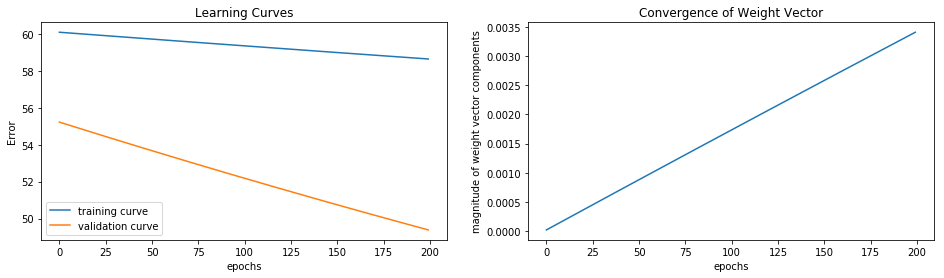

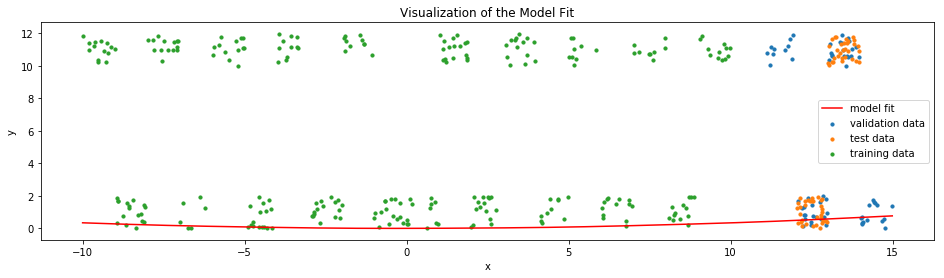

Final Validation Loss: 49.38494690761332


In [23]:
# training and validation data
(x_train, y_train, x_val, y_val) = np.load('linear_reg_data.npy')

### YOUR CODE SHOULD BEGIN HERE ###

(x_train, y_train, x_val, y_val, x_test, y_test, left_limit, right_limit) = utils.data_generator(
    utils.sawtooth, 
    train_left=-10, train_right=10, train_size=256,
    val_left=11, val_right=15, val_size=64,
    test_left=12, test_right=14, test_size=64)

# convert all the splits into numpy arrays
x_train, y_train = np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1)
x_val, y_val = np.array(x_val).reshape(-1,1), np.array(y_val).reshape(-1,1)
x_test, y_test = np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1)

TRAIN_LOSS = []
VAL_LOSS = []
no_epochs = 200

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 1. Hyper-parameters that you have to adjust in order to minimize the validation loss.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 2. Now you need to implement the 'fourier' part of the calc_features() function in the models.py file.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
feat_type = 'your_own_features'
param = 4 # specifies the number of basic sine and cosine component waves to be used
lr = .00000008
weight_init = 'zeros'

# create a model object from the linear_model class
W_size = models.calc_features(np.array([[0]]), choice=feat_type, param=param).shape[1]
learning_model = models.linear_model(W_size=W_size, lr=lr, init=weight_init) 

for epoch in range(no_epochs):
    feat_train = models.calc_features(x_train, choice=feat_type, param=param)
    
    # forward pass: calculate the model's prediction on training data
    y_pred_train = learning_model.forward(feat_train)
    
    # compute the loss on training data
    loss_train = learning_model.loss(y_train, y_pred_train)
    TRAIN_LOSS.append(loss_train)
    
    # compute loss on validation data
    feat_val = models.calc_features(x_val, choice=feat_type, param=param)
    y_pred_val = learning_model.forward(feat_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    loss_val = learning_model.loss(y_val, y_pred_val)
    VAL_LOSS.append(loss_val)
    
    # backward pass: train the linear regression model, using gradient descent
    learning_model.backward(y_train, y_pred_train, feat_train)
        
# plot the training curves, convergence of weight vector, data fit
x_pred = np.arange(left_limit, right_limit, 0.01).reshape(-1,1)
feat = models.calc_features(x_pred, choice=feat_type, param=param)
y_pred = learning_model.forward(feat)

utils.plot(TRAIN_LOSS, VAL_LOSS, learning_model.LIST_W.T, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print('Final Validation Loss: {}'.format(loss_val))

### YOUR CODE SHOULD END HERE ###

# save your tuned hyper-parameters
utils.save_hyper('unknown', feat_type, param, lr, weight_init)